In [1]:
import pandas as pd
import numpy as np

In [2]:
merged_air_movement = pd.read_csv("air_movement_changes.csv")

In [3]:
merged_air_movement.head()

,Unnamed: 0,date,STATE,COUNTY,DAILY_AQI_VALUE,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2819,2/15/20,Alabama,Jefferson,31.2,4.0,1.0,109.0,3.0,2,0
1,2820,2/15/20,Alabama,Madison,26.0,2.0,1.0,49.0,4.0,3,-1
2,2821,2/15/20,Alabama,Montgomery,51.0,6.0,1.0,56.0,6.0,3,-1
3,2822,2/15/20,Alabama,Morgan,25.0,7.0,6.0,55.0,6.0,3,0
4,2823,2/15/20,Alabama,Russell,31.0,9.0,3.0,NaN,NaN,-2,-1


In [4]:
merged_air_movement.drop(['Unnamed: 0'], axis=1)

,date,STATE,COUNTY,DAILY_AQI_VALUE,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2/15/20,Alabama,Jefferson,31.2,4.0,1.0,109.0,3.0,2,0
1,2/15/20,Alabama,Madison,26.0,2.0,1.0,49.0,4.0,3,-1
2,2/15/20,Alabama,Montgomery,51.0,6.0,1.0,56.0,6.0,3,-1
3,2/15/20,Alabama,Morgan,25.0,7.0,6.0,55.0,6.0,3,0
4,2/15/20,Alabama,Russell,31.0,9.0,3.0,NaN,NaN,-2,-1
...,...,...,...,...,...,...,...,...,...,...
69089,4/1/20,Wyoming,Sheridan,NaN,-37.0,2.0,NaN,NaN,-34,15
69090,4/7/20,Wyoming,Sheridan,NaN,-31.0,NaN,NaN,NaN,-34,13
69091,4/8/20,Wyoming,Sheridan,NaN,-32.0,NaN,NaN,NaN,-34,13
69092,4/9/20,Wyoming,Sheridan,NaN,-29.0,NaN,NaN,NaN,-34,12


In [5]:
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_test = pd.DataFrame(merged_air_movement.groupby(['STATE']).mean()['DAILY_AQI_VALUE'])
df_test.head()

,DAILY_AQI_VALUE
STATE,
Alabama,37.179147
Alaska,19.109244
Arizona,18.800728
Arkansas,30.182197
California,24.413836


In [11]:
df_test['STATE'] = df_test.index
df_test=df_test.sort_values(by=['DAILY_AQI_VALUE'], ascending=True)
df_test.head()

,DAILY_AQI_VALUE,STATE
STATE,,
Wyoming,9.933775,Wyoming
Hawaii,12.346240,Hawaii
New Mexico,14.570270,New Mexico
Rhode Island,16.089506,Rhode Island
Utah,16.186441,Utah


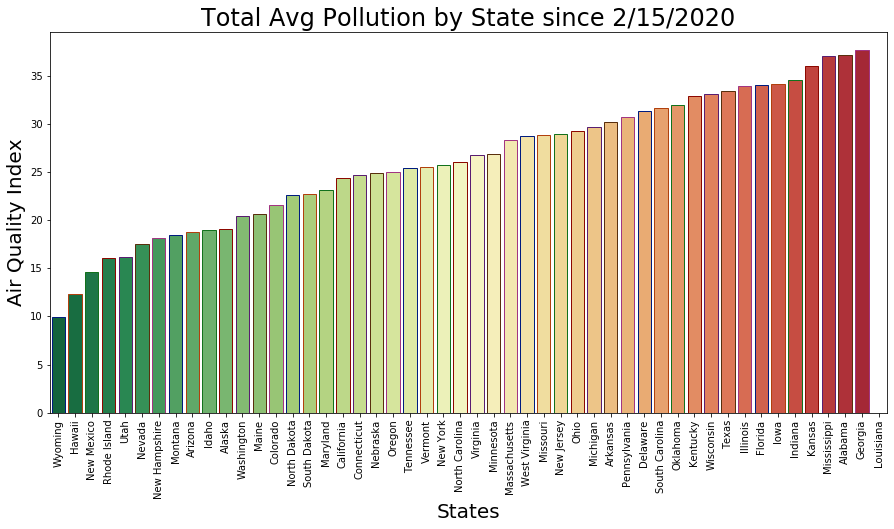

In [15]:
plt.subplots(figsize=(15,7))
sns.barplot(x='STATE', y='DAILY_AQI_VALUE', data=df_test, palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Air Quality Index', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=20)
plt.title('Total Avg Pollution by State since 2/15/2020', fontsize=24)
plt.savefig('Statewide Total Avg Pollution.png')
plt.show()

In [24]:
merged_air_movement['date'] = pd.to_datetime(merged_air_movement['date'])

In [32]:
movement_by_date = pd.DataFrame(merged_air_movement.groupby(['date']).mean()['retail_and_recreation_percent_change_from_baseline'])
movement_by_date.head()

,retail_and_recreation_percent_change_from_baseline
date,
2020-02-15,5.635831
2020-02-16,7.863813
2020-02-17,5.692525
2020-02-18,0.370779
2020-02-19,2.714469


In [28]:
movement_by_date = merged_air_movement.unstack(level = 0)
movement_by_date.columns = movement_by_date.columns.get_level_values(1)
movement_by_date

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
#Set plot size
plt.figure(figsize = (15,7))

# Set error bars and line formatting
plt.errorbar(merged_air_movement.index, merged_air_movement["Capomulin"], yerr=table_tumor_volume_stde["Capomulin"], color="red", marker="d", markersize=5, linestyle="dashed", linewidth=0.75)
plt.errorbar(table_tumor_volume_mean.index, table_tumor_volume_mean["Infubinol"], yerr=table_tumor_volume_stde["Infubinol"], color="blue", marker="^", markersize=5, linestyle="dashed", linewidth=0.75)
plt.errorbar(table_tumor_volume_mean.index, table_tumor_volume_mean["Ketapril"], yerr=table_tumor_volume_stde["Ketapril"], color="green", marker="s", markersize=5, linestyle="dashed", linewidth=0.75)
plt.errorbar(table_tumor_volume_mean.index, table_tumor_volume_mean["Placebo"], yerr=table_tumor_volume_stde["Placebo"], color="black", marker="o", markersize=5, linestyle="dashed", linewidth=0.75)

# Set descriptors 
plt.title("Tumor Response to Treatment", fontsize=18)
plt.xlabel("Treatment Days", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.grid(linestyle="dotted")
plt.legend(("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)

# Save the Figure
plt.savefig("../TumorVolumeResponse.png")

# Show the Figure
plt.show()

In [ ]:
dict_pol['o3'].plot( y=['AvgAQI_Hawaii','AvgAQI_Arizona','AvgAQI_Illinois',
                        'AvgAQI_Oklahoma','AvgAQI_California'], ax=axs[0,0],
                    title='Evolution of o3')

In [ ]:
#from google.cloud import bigquery
#from bq_helper import BigQueryHelper
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
# google bigquery library for quering data
#from google.cloud import bigquery
# BigQueryHelper for converting query result direct to dataframe
#from bq_helper import BigQueryHelper